### Week 13. Time series data and causal inference

By Charlie Eaton, April 2020

In [46]:
%set graph_format svg

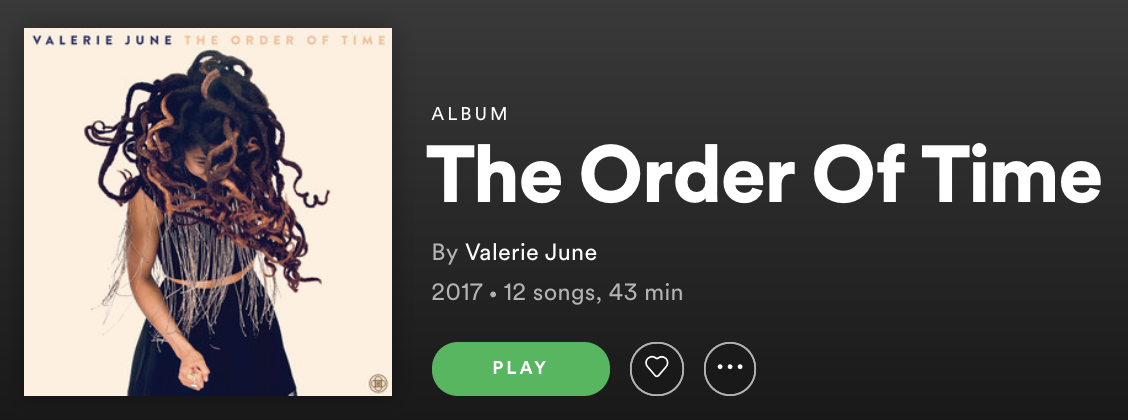

### Outline:

    A. Comparisons over time as substitutes for randomized control trials 

    B. Data carpentry: sorting / ordering data for analysis

    C. OLS Fixed effects as within-unit comparisons over time

    D. Interactions as treatment comparisons with fixed effects

    E. Logistic regression with fixed effects

    F. Time and group fixed effects

### A. Comparisons over time as substitutes for randomized control trials

Consider the use of randomized control trials if we want to test if cell immunity to Covid (DV) is **caused** by a hypothesized vaccine (IV):

1. Randomized control trials: a method to test for causal relationsips
    
2. Units (a person, animal, or material object - in this, human cell cultures) are randomly assigned to **"treatment"** and **"control"** groups.
    
3. Units assigned to the "treatment" group are "treated" with the independent variable (IV) - in this case, the vaccine. The "control" group is not treated with the vaccine.
    
4. The researcher then meaures the dependent variable (DV) of whether the cell cultures become infected when exposed to Covid for both the treatment and the control group.
    
5. Such a randomized control trial intrinsically involves a comparison over time that we can represent as hypotheses in a 2 X 2 table:

|            | Control     | Treatment  |
| ---------- |-----------| -----|
| **After**     | infection | No-infection |
| **Before**      | No-infection      |   No-infection |

A before / after approach can also provide causal insights for some observational data analysis if:

1. We have variation in our independent variables (IVs) over time

2. Independent variables (IVs) are not influenced by the dependent variables at an earlier moment in time

Use the markdown cell below to summarize the overarching hypothesis about predatory for-profit college practices from this week's "Private equity in higher education" reading:

Name the dependent variable: [varname here]
Name the treatment (indepdent variable here): [varname here)

|            | Control       | Treatment  |
| ---------- |---------------| -----------|
| **After**  | [prediction]  | [prediction] |
| **Before** | [prediction]  | [prediction] |

### B. Data carpentry: sorting / ordering data for analysis

1. The intuition of time series regression techniques flows from how we sort and order the data

2. Data carpentry is the work of structuring data - including sorting and ordering

3. We sort data by time **within** each unit of analysis.

4. For example, we could sort data **by year** but **within each university** when analyzing time series data for % of university board members from high finance (DV) and university admissions rates (IV) as follows. To do so, we could use **unitid** as a **unique identifier** for each university from my board dataset.

5. Edit the sort code below to sort by year within each university and list the first 30 universities:

In [44]:
quietly {
cd "/Users/Charlie/Dropbox/Bankers in the Ivory Tower Book/2 Our New Financial Oligarchy/Data/Boards 2000 to 2017"
set more off
use board_endow_donation_directory_20181221, clear
quietly drop if top30private!=1 & top30public!=1
quietly drop if pctnonfinance==.
drop if year<2003
label define schooltype 2 "public" 3 "private"
label values schooltypenum schooltype
quietly set linesize 200
}

**this is the sort code:
sort unitid year

**this lists the first 30 observations after sorting:
list unitid year schoolname pctalt acceptrate if _n<30



. sort unitid year

. list unitid year schoolname pctalt acceptrate if _n<30

     +--------------------------------------------------------------------------+
     | unitid   year                           schoolname     pctalt   accept~e |
     |--------------------------------------------------------------------------|
  1. | 104179   2006                 arizona state system          0   86.05576 |
  2. | 104179   2007                 arizona state system          0   77.42151 |
  3. | 104179   2008                 arizona state system          0   80.54471 |
  4. | 104179   2009                 arizona state system          0   78.00129 |
  5. | 104179   2010                 arizona state system          0   75.36145 |
     |--------------------------------------------------------------------------|
  6. | 104179   2011                 arizona state system          0   75.36145 |
  7. | 104179   2012                 arizona state system          0   71.39346 |
  8. | 104179   20

5. We can visually represent the data using **xtset** (which sets our systemf of sorting for analysis) and **xtline** where the **"t"** refers to time

6. For example, the following plots my DV, % high finance board members, over time for the top 30 private universities:


       panel variable:  unitid (unbalanced)
        time variable:  year, 2003 to 2017
                delta:  1 unit


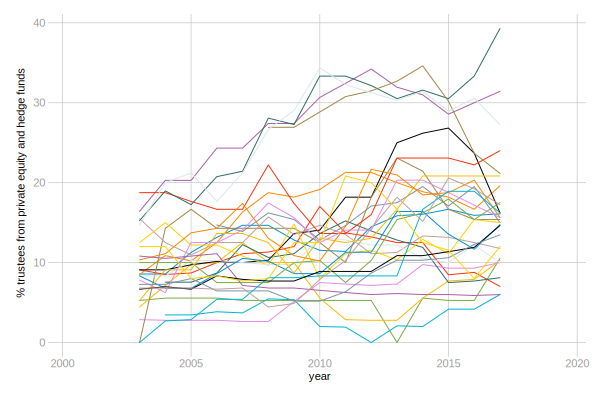

In [55]:
xtset unitid year
xtline pctalt if control==2, over legend(off) scheme(538w)
graph display

### C. OLS with fixed effects as within-unit comparisons over time

1. The fixed effect in OLS is a magical method to control for the effects of unobserved time-constant (fixed) variables for each unit of analysis. Some examples could include:
    * who a person's father or mother were
    * what city someone was born in
    * how many siblings someone had growing up
    * what city/state an organization is located in
    * unchanging differences in laws in a location where a person/organization/community is located


2. Mathematical time series symbols help to explain how:

* $ T $ is our time variable (in this case year). Particular values for $ T $ (like 2005) are represented by lowercase $ t $ 
* $ I $ is our unique identifier for each individual/unit (in this case school unitid). Particular individuals are represented by lowercase $ i $
* $ y_{it} $ is the dependent variable (% board from high finance) observed for individual $ i $ at time $ t $
* $ X_{it} $ is a vector of time-variant independent variables (like university admission rates)
* $ \beta $ is a vector of coefficients for the relationships between $ y_{it} $ and each $ X_{it} $
* $ \alpha_{i} $ is the combined effect of all time-invariant unobserved influences on $ y_{it} $ for each individual $ i $ (in our case each school)
* $ u_{it} $ is the residual (unexplained) variation in $ y_{it} $

3. OLS with fixed effect gets rid of the time invariant unobserved variables $ \alpha_{i} $ that might bias our estimates by **differencing** them out of the analysis. The procedure subtracts values for every variable in the model for individual $ i $ at time $ t $ from the mean of the variable for the individual $ i $ at all times as follows:

$$ y_{it} = {\beta}X_{it}\mathbf+\alpha_{i}+u_{it} $$

$$ y_{it}-\overline{y}_{i}={\beta}\left(X_{it}-\overline{X}_{i}\right) + \left( \alpha_{i} - \overline{\alpha}_{i} \right ) + \left(  u_{it}-\overline{u}_{i}\right)  $$

$$ y_{it}-\overline{y}_{i}={\beta}\left(X_{it}-\overline{X}_{i}\right) + \left(  u_{it}-\overline{u}_{i}\right)  $$

4. We can equivalently do this differencing procedure in Stata prior to OLS by using our sorting together with **egen**:

In [ ]:
quietly foreach var in pctalt acceptrate pctunderfirst fgrnt_p /// 
logtotal03_revenue endow_assets_c_log {

*FIRST, USE EGEN WITH BYSORT TO CALCULTE THE MEAN ///
*FOR EACH MODEL VARIABLE FOR EACH UNITID (SCHOOL) ACROSS ALL YEARS
bysort unitid: egen m_`var'=mean(`var')

*SECOND, SUBTRACT EACH OBSERVATION FOR EVERY I,T (UNITID-YEAR) ///
    FROM THE MEAN FOR EACH VARIABLE FOR EACH I (UNITID)
gen dm_`var'=`var'-m_`var'

}


/Users/Charlie/Dropbox/Bankers in the Ivory Tower Book/2 Our New Financial Oliga
> rchy/Data/Boards 2000 to 2017





(169 observations deleted)




In [30]:
*drop d_*
xtset unitid year
foreach var in pctalt acceptrate pctunderfirst fgrnt_p /// 
logtotal03_revenue endow_assets_c_log {
gen d_`var'=`var'-l.`var'
bysort unitid: egen m_`var'=mean(`var')
gen dm_`var'=`var'-m_`var'
*quietly by unitid: gen d_`var'=`var'-`var'[_n-1]
}
reg dm_pctalt dm_acceptrate dm_pctunderfirst dm_fgrnt_p dm_logtotal03_revenue dm_endow_assets_c_log
reg d_pctalt d_acceptrate d_pctunderfirst d_fgrnt_p d_logtotal03_revenue d_endow_assets_c_log


       panel variable:  unitid (unbalanced)
        time variable:  year, 2003 to 2017
                delta:  1 unit

(60 missing values generated)
(60 missing values generated)
(60 missing values generated)
(60 missing values generated)
(76 missing values generated)
(9 missing values generated)
(92 missing values generated)
(32 missing values generated)


      Source |       SS           df       MS      Number of obs   =       846
-------------+----------------------------------   F(5, 840)       =     24.52
       Model |  1112.37032         5  222.474063   Prob > F        =    0.0000
    Residual |  7622.45978       840  9.07435689   R-squared       =    0.1273
-------------+----------------------------------   Adj R-squared   =    0.1222
       Total |   8734.8301       845   10.337077   Root MSE        =    3.0124

-------------------------------------------------------------------------------
    dm_pctalt |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
----


      Source |       SS           df       MS      Number of obs   =       779
-------------+----------------------------------   F(5, 773)       =      2.32
       Model |  60.3341506         5  12.0668301   Prob > F        =    0.0417
    Residual |  4020.88715       773  5.20166513   R-squared       =    0.0148
-------------+----------------------------------   Adj R-squared   =    0.0084
       Total |   4081.2213       778  5.24578573   Root MSE        =    2.2807

-------------------------------------------------------------------------------
     d_pctalt |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
 d_acceptrate |  -.0393174   .0231575    -1.70   0.090    -.0847764    .0061415
d_pctunderf~t |   .8474904   1.835712     0.46   0.644     -2.75608    4.451061
    d_fgrnt_p |   .0210739   .0261041     0.81   0.420    -.0301694    .0723172
d_logtotal0~e |   .3758985   .2191823     1.

In [12]:
xtset unitid year
est clear
xtreg pctalt acceptrate pctunderfirst fgrnt_p  ///
logtotal03_revenue endow_assets_c_log, fe
est sto fixed


       panel variable:  unitid (unbalanced)
        time variable:  year, 2003 to 2017
                delta:  1 unit



Fixed-effects (within) regression               Number of obs     =        846
Group variable: unitid                          Number of groups  =         60

R-sq:                                           Obs per group:
     within  = 0.1273                                         min =          8
     between = 0.3959                                         avg =       14.1
     overall = 0.3644                                         max =         15

                                                F(5,781)          =      22.78
corr(u_i, Xb)  = 0.1494                         Prob > F          =     0.0000

-------------------------------------------------------------------------------
       pctalt |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
   acceptrate |  -.

In [14]:
xtreg pctalt acceptrate pctunderfirst fgrnt_p  ///
logtotal03_revenue endow_assets_c_log, re
est sto random
hausman fixed random



Random-effects GLS regression                   Number of obs     =        846
Group variable: unitid                          Number of groups  =         60

R-sq:                                           Obs per group:
     within  = 0.1240                                         min =          8
     between = 0.4906                                         avg =       14.1
     overall = 0.4392                                         max =         15

                                                Wald chi2(5)      =     167.52
corr(u_i, X)   = 0 (assumed)                    Prob > chi2       =     0.0000

-------------------------------------------------------------------------------
       pctalt |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
   acceptrate |  -.1684736    .016488   -10.22   0.000    -.2007895   -.1361577
pctunderfirst |   2.427925   2.093903     1.16   0.246     

In [ ]:
reg pctalt acceptrate pctunderfirst fgrnt_p  ///
logtotal03_revenue endow_assets_c_log i.unitid

In [10]:
%help est sto

This front-end cannot display HTML help.